In [37]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

import warnings
warnings.filterwarnings('ignore')

In [23]:
def load_data(file_path):
    """
    Загрузка данных из CSV файла в DataFrame.
    """
    return pd.read_csv(file_path)

def merge_data(sales_df, pr_df, pr_st):
    """
    Объединение данных из трех файлов.
    """
    merged_df = pd.merge(sales_df, pr_df, on='pr_sku_id', how='left')
    merged_df = pd.merge(merged_df, pr_st, on='st_id', how='left')
    return merged_df

In [24]:
sales_df = load_data('data\\sales_df_train.csv')
pr_df = load_data('data\\pr_df.csv')
pr_st = load_data('data\st_df.csv')

In [25]:
# Преобразование столбца с датами в тип datetime
sales_df['date'] = pd.to_datetime(sales_df['date'])

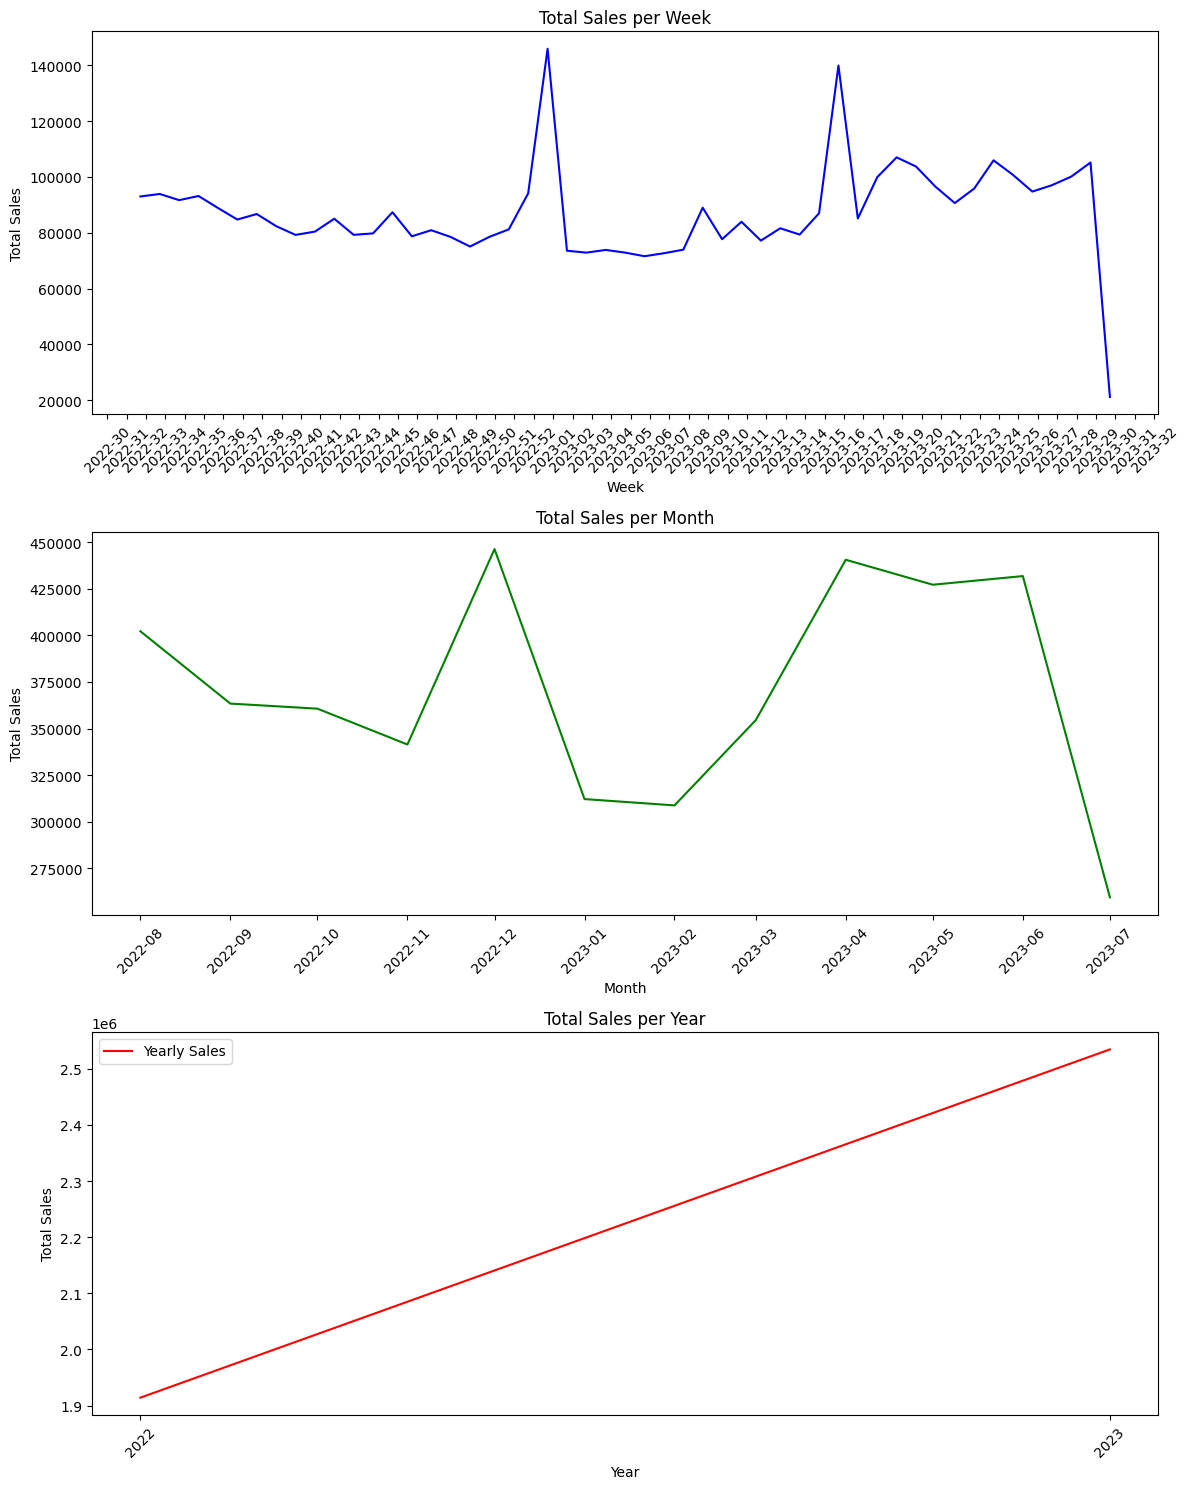

In [42]:
# Создание новых столбцов с датами начала недели, месяца и года
sales_df['week_start'] = sales_df['date'] - pd.to_timedelta(sales_df['date'].dt.dayofweek, unit='d')
sales_df['month_start'] = sales_df['date'] - pd.to_timedelta(sales_df['date'].dt.day - 1, unit='d')
sales_df['year_start'] = sales_df['date'] - pd.to_timedelta(sales_df['date'].dt.dayofyear - 1, unit='d')

# Группировка данных по неделям, месяцам и годам и суммирование продаж
weekly_sales = sales_df.groupby(pd.Grouper(key='week_start', freq='W'))['pr_sales_in_units'].sum()
monthly_sales = sales_df.groupby(pd.Grouper(key='month_start', freq='MS'))['pr_sales_in_units'].sum()
yearly_sales = sales_df.groupby(pd.Grouper(key='year_start', freq='YS'))['pr_sales_in_units'].sum()

# Создание объектов для графиков
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# Построение графика продаж по неделям
axes[0].plot(weekly_sales.index, weekly_sales.values, label='Weekly Sales', color='blue')
axes[0].set_title('Total Sales per Week')
axes[0].set_ylabel('Total Sales')
axes[0].xaxis.set_major_locator(mdates.WeekdayLocator())
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%W'))
axes[0].set_xlabel('Week')
axes[0].tick_params(axis='x', rotation=45)  # Поворот подписей на 45 градусов

# Построение графика продаж по месяцам
axes[1].plot(monthly_sales.index, monthly_sales.values, label='Monthly Sales', color='green')
axes[1].set_title('Total Sales per Month')
axes[1].set_ylabel('Total Sales')
axes[1].xaxis.set_major_locator(mdates.MonthLocator())
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
axes[1].set_xlabel('Month')
axes[1].tick_params(axis='x', rotation=45)  # Поворот подписей на 45 градусов

# Построение графика продаж по годам
axes[2].plot(yearly_sales.index, yearly_sales.values, label='Yearly Sales', color='red')
axes[2].set_title('Total Sales per Year')
axes[2].set_ylabel('Total Sales')
axes[2].set_xlabel('Year')
axes[2].xaxis.set_major_locator(mdates.YearLocator())
axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axes[2].tick_params(axis='x', rotation=45)  # Поворот подписей на 45 градусов

# Отображение легенды на последнем графике
axes[2].legend()

# Выравнивание графиков
plt.tight_layout()

# Отображение графиков
plt.show()
